<a href="https://colab.research.google.com/github/ABHI2410/ComputerVision/blob/AssignmentsDevelopment/PA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 6367 Programming Assignment 1 (P1)
## Summer 2023
## Due: 11:59pm Central Time, Friday, July 7, 2023

Note: For Task 1 - Task 4 of this programming assignment, you may use any libraries you want.

### Task 1 (25 points)

Import the "colors.png" image

<img src = "Images/colors.png" style="width:200px;height:200px">

a) Display the Red, Green and Blue color channels separately in a 1X3 plot. Use grayscale colormap for displaying the images (cmap = "gray" in matplotlib)

b) Convert the image to grayscale using the formula, grayscale = (Red + Green + Blue / 3) and display the image.

c) Apply a mask on the original image based on pixel intensity values where red pixel values are in the range (100-255) and blue and green pixel values are in the range (0-50) and show the masked image.

d) Display the Text "Red" inside the Red part of the image, "Green" inside the Green part and "Blue" inside the green part of the image. Use a reasonable font size and display the texts ("Red, "Green", "Blue") in white color.

In [ ]:
#imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy

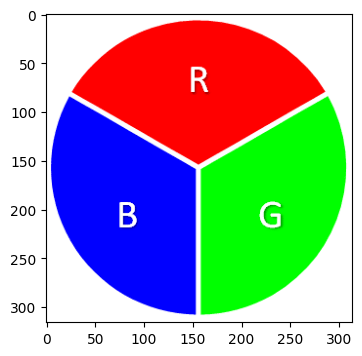

In [ ]:
# Task 1
#import colors.png
original_image = cv2.imread("./Images_directory/colors.png")
original_imageRGB = original_image[:,:,::-1]

plt.figure(figsize=(4,4))
plt.imshow(original_imageRGB)
plt.show()


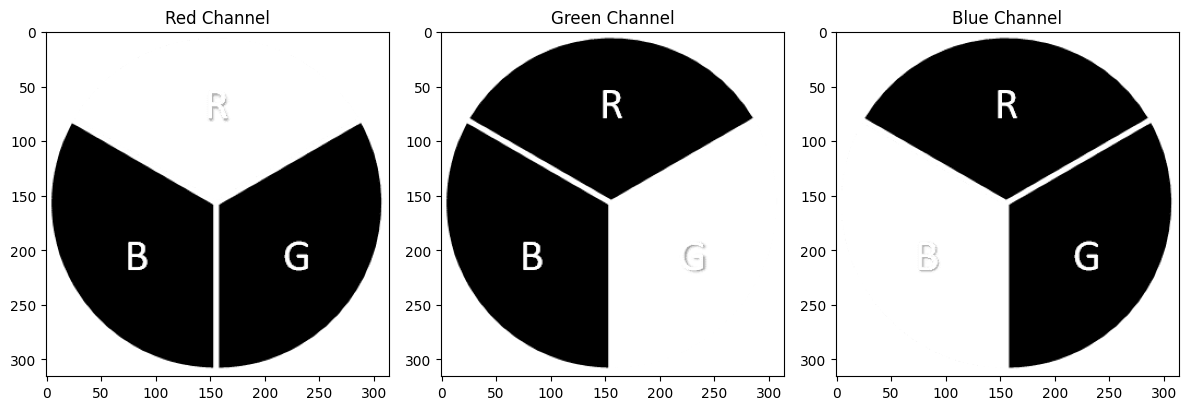

In [ ]:
#Task 1 (a)
#Get channel values
blue_channel = original_image[:,:,0]
green_channel = original_image[:,:,1]
red_channel = original_image[:,:,2]

# Create a 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Display the red channel
axs[0].imshow(red_channel, cmap='gray')
axs[0].set_title('Red Channel')

# Display the green channel
axs[1].imshow(green_channel, cmap='gray')
axs[1].set_title('Green Channel')

# Display the blue channel
axs[2].imshow(blue_channel, cmap='gray')
axs[2].set_title('Blue Channel')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

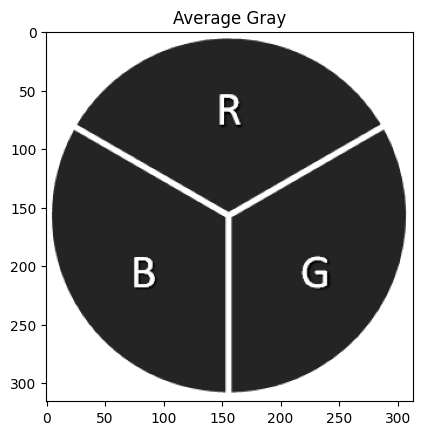

In [ ]:
#Task 1 (b)
#creating average grey
Average_Gray = blue_channel/3+green_channel/3+red_channel/3
plt.imshow(Average_Gray, cmap = "gray");
plt.title("Average Gray");


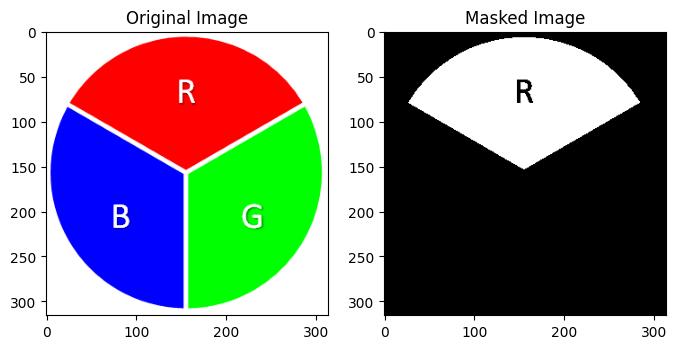

In [ ]:
#Task 1 (c)
# Mask based on rgb values
mask = cv2.inRange(original_image, (0,0,100), (50,50,255))


plt.figure(figsize=[8,8])
plt.subplot(121);
plt.imshow(original_imageRGB)
plt.title("Original Image");

plt.subplot(122);
plt.imshow(mask, cmap = "gray");
plt.title("Masked Image");

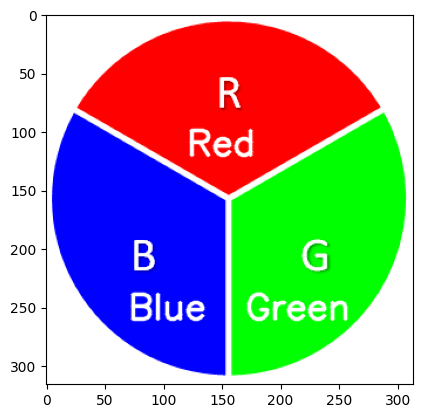

In [ ]:
#Task 1 (d)

imageText = original_imageRGB.copy()
cv2.putText(imageText,'Red',(120,120), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2,cv2.LINE_AA);
cv2.putText(imageText,'Green',(170,260), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2,cv2.LINE_AA);
cv2.putText(imageText,'Blue',(70,260), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2,cv2.LINE_AA);

# Display Image with Text
plt.imshow(imageText)

### Task 2 (25 points)

Import the "cameraman.jpeg" image and apply different geometric transformations to it.

a) Shift the original image 50 pixels left and 50 pixels down and display the translated image.

b) Rotate the image by 60 degree and display the result.

c) Flip the image vertically and horizontally and display the results in a 1X2 plot.

d) Crop the head part of the cameraman and display it. (no specific crop requirement, any reasonable crop of the head will be considered correct)

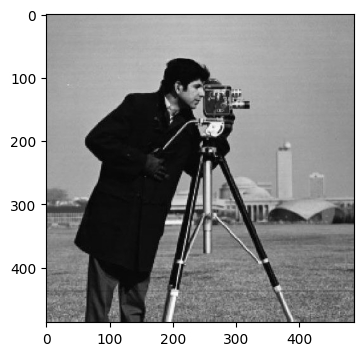

In [ ]:
# Task 2
#import Cameraman.jpeg
original_image = cv2.imread("./Images_directory/cameraman.jpeg")

plt.figure(figsize=(4,4))
plt.imshow(original_image)
plt.show()

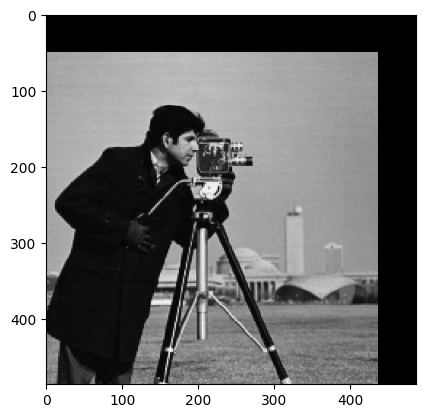

In [ ]:
# Task 2 (a)
#shifting 50 left 50 down

#identtify height and width of image
height, width = original_image.shape[:2]

#create translation matrix
translation_matrix = np.array([[1, 0, -50],
                               [0, 1, 50]], dtype=np.float32)

#do the translation
translated_image = cv2.warpAffine(src=original_image, M=translation_matrix, dsize=(width, height))

plt.imshow(translated_image)

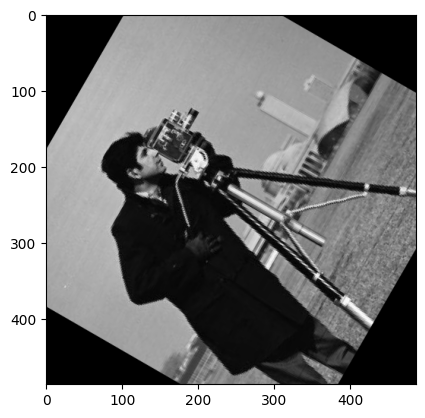

In [ ]:
# Task 2 (b)
# rotate by 60 degrees

# identify the center
center = (width/2, height/2)

#create the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=60, scale=1)

#rotate the image
rotated_image = cv2.warpAffine(src=original_image, M=rotate_matrix, dsize=(width, height))


plt.imshow(rotated_image)

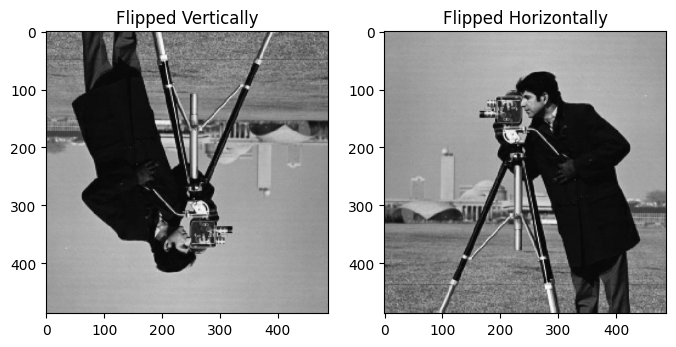

In [ ]:
#Task 2 (c)
# Flip horizontal and veritical

flip_vertical = cv2.flip(original_image, 0)
flip_horizontal = cv2.flip(original_image, 1)

# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(8, 8))

# Display the vertically flipped image
axs[0].imshow(flip_vertical)
axs[0].set_title('Flipped Vertically')


# Display the horizontally flipped image
axs[1].imshow(flip_horizontal)
axs[1].set_title('Flipped Horizontally')


# Display the plot
plt.show()

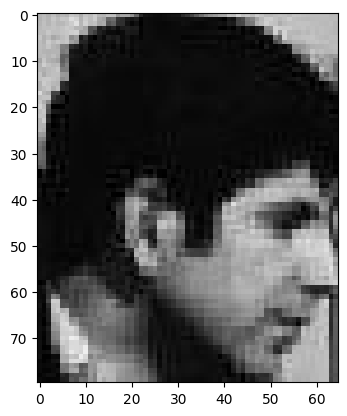

In [ ]:
# Task 2 (d)
# crop the head

crop = original_image[70:150,185:250]
plt.imshow(crop)

### Task 3 (25 points)

Import the "cameraman.jpeg" image and

a) Perform average blur with kernel size 9X9 and 25X25.

b) Perform gaussian blur with kernel size 9X9, sigma (standard deviation of the Gaussian) of 2.0 and another gaussian blur with kernel size 25X25, sigma 15.0

c) Perform median blur with kernel size 5X5 and 15X15.

d) Resize the guassian blurred image with kernel size 25X25 and sigma 15 to 40X40 pixels, and resize the original image to 40X40 pixels.

Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered/processed images in a 1X3 grid.

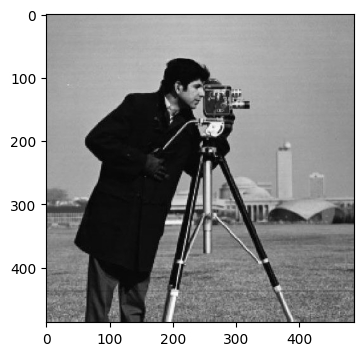

In [ ]:
# Task 3
#import Cameraman.jpeg
original_image = cv2.imread("./Images_directory/cameraman.jpeg")

plt.figure(figsize=(4,4))
plt.imshow(original_image)
plt.show()

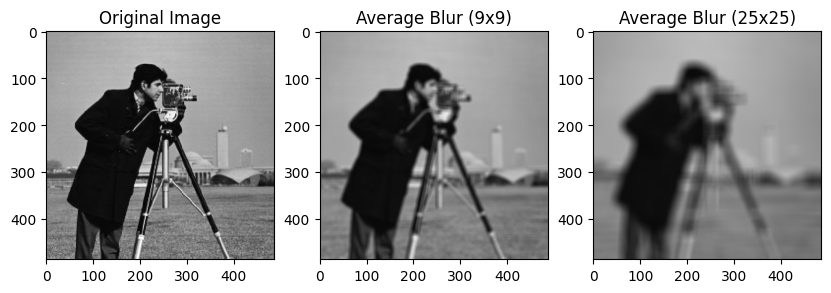

In [ ]:
# Task 3 (a)

# Perform average blur with a 9x9 kernel
blur_9x9 = cv2.blur(original_image, (9, 9))

# Perform average blur with a 25x25 kernel
blur_25x25 = cv2.blur(original_image, (25, 25))

# Create a 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(10, 8))

#Display the image
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

# Display the image with a 9x9 average blur
axs[1].imshow(blur_9x9)
axs[1].set_title('Average Blur (9x9)')

# Display the image with a 25x25 average blur
axs[2].imshow(blur_25x25)
axs[2].set_title('Average Blur (25x25)')


# Display the plot
plt.show()

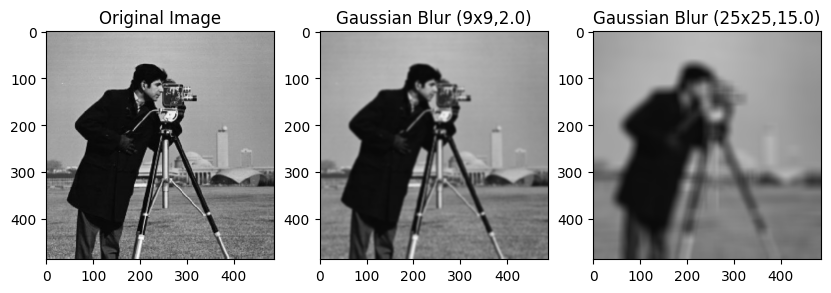

In [ ]:


# Perform Gaussian blur with a 9x9 kernel
blur_9x9 = cv2.GaussianBlur(original_image, (9, 9), 2.0)

# Perform Gaussian blur with a 25x25 kernel
blur_25x25 = cv2.GaussianBlur(original_image, (25, 25), 15.0)

# Create a 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(10, 8))

#Display the image
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

# Display the image with a 9x9,2.0 Gaussian blur
axs[1].imshow(blur_9x9)
axs[1].set_title('Gaussian Blur (9x9,2.0)')

# Display the image with a 25x25,15.0 Gaussian blur
axs[2].imshow(blur_25x25)
axs[2].set_title('Gaussian Blur (25x25,15.0)')


# Display the plot
plt.show()

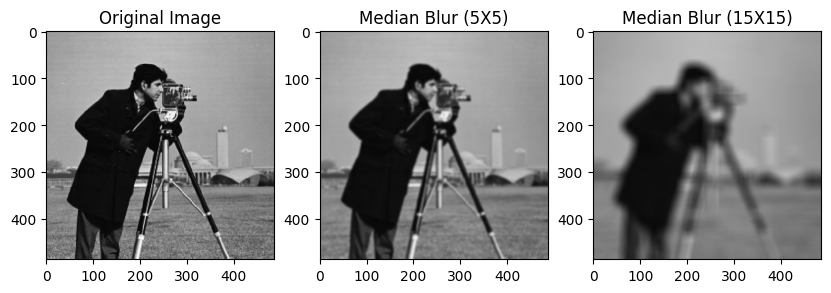

In [ ]:


# Perform median blur with a 5x5 kernel
blur_5x5 = cv2.medianBlur(original_image, 5)

# Perform median blur with a 15x15 kernel
blur_15x15 = cv2.medianBlur(original_image, 15)

# Create a 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(10, 8))

#Display the image
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

# Display the image with a 5x5 median blur
axs[1].imshow(blur_9x9)
axs[1].set_title('Median Blur (5X5)')

# Display the image with a 15x15 median blur
axs[2].imshow(blur_25x25)
axs[2].set_title('Median Blur (15X15)')


# Display the plot
plt.show()

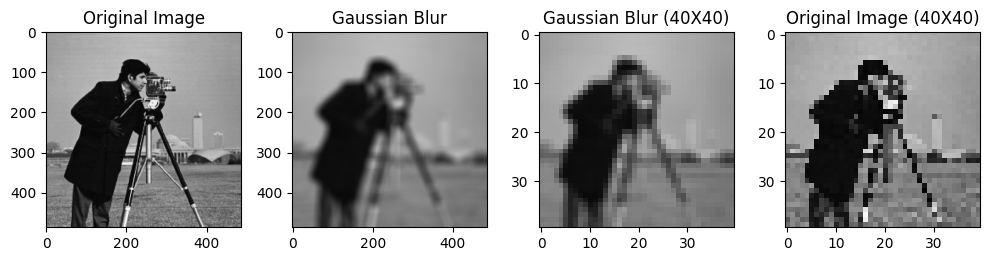

In [ ]:


# Perform Gaussian blur with a 25x25 kernel and sigma 15
blur = cv2.GaussianBlur(original_image, (25, 25), 15)

# Resize the blurred image to 40x40 pixels
resized_blur = cv2.resize(blur, (40, 40))

# Resize the original image to 40x40 pixels
resized_image = cv2.resize(original_image, (40, 40))

# Create a 1x4 subplot
fig, axs = plt.subplots(1, 4, figsize=(10, 8))

#Display the image
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

#Display the Gaussian Blur image
axs[1].imshow(blur)
axs[1].set_title('Gaussian Blur')

#Display the Gaussian Blur 40X40 image
axs[2].imshow(resized_blur)
axs[2].set_title('Gaussian Blur (40X40)')

#Display the Original 40X40 image
axs[3].imshow(resized_image)
axs[3].set_title('Original Image (40X40)')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Task 4 (25 points)

Import the "cameraman.jpeg" image and apply

a) Sobel edge detector (Apply horizontal and vertical sobel filters and display the Sobel magnitude image)

b) Prewitt edge detector (Apply horizontal and vertical prewitt filters and display the Prewitt magnitude image)

c) Laplacian edge detector

d) Canny edge detector
    
Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 1X2 plot.

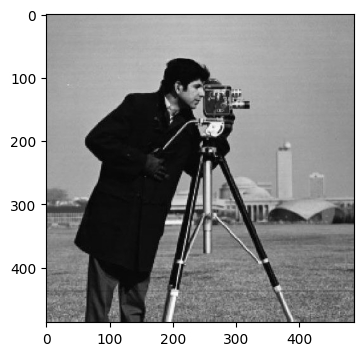

In [ ]:
# Task 4
#import Cameraman.jpeg

original_image = cv2.imread("./Images_directory/cameraman.jpeg")

plt.figure(figsize=(4,4))
plt.imshow(original_image)
plt.show()

In [ ]:

print(original_image.shape)
print(type(original_image))
print(original_image.ndim)


(487, 487, 3)
<class 'numpy.ndarray'>
3


### Task 5 (optional - 20 points)

Implement "Canny Edge Detector" from scratch without using any library functions and compare your result with OpenCV implementation of "Canny Edge Detector"

## Submission Guidelines:

1. Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)

2. Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.

3. You don't need to attach the image file with your submission.
